In [1]:
import nltk
import re
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
import numpy as np
import pandas
import glob
#import powerlaw
import itertools
import os
import nltk.data

In [2]:
def drange(start, stop, step):
    r = start
    while r <= stop:
        yield r
        r += step
        
        
def seqenc(start, stop, step):
    return [ x for x in drange(start, stop, step)] 

def utf8len(s):
    return len(s.encode('utf-8'))

In [3]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
pattern = r'''\w+(?:[-']\w+)*'''
pattern2 = r'''\w+(?:[-']\w+)*|[.,;?!:]'''
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
split_pun=['.',',','?','!',';',':']

In [4]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

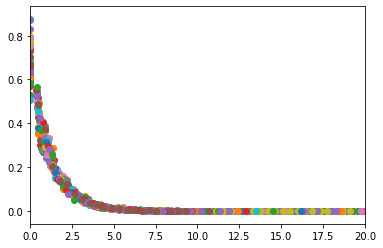

In [5]:
'''NND for many text'''
directory = "/home/xierr/Desktop/pato_new/DNA_use/"
outputdir = "/home/xierr/Desktop/pato_new/DNA_NND_results"
outputdir2 = "/home/xierr/Desktop/pato_new/DNA_L_results"
for book in os.listdir(directory):
    if not book.startswith("."):
        with open(directory + book) as f:      
        
            input_str = f.read()
            input_str = re.sub(r'[\t\n]+', '', input_str)  #remove \t
            tokens = [input_str[i] for i in range(0, len(input_str))]
            tokens_fre = nltk.FreqDist(tokens)
            most_fre = [key for key, value in sorted(tokens_fre.items(), key=lambda item: item[1],reverse=True)][0]
            number = find(input_str, most_fre)
        
            couLen=[]
            for l in range(0, len(number)-1, 1):
                couLen.append(number[l+1]-number[l]-1)
        
            num_words=len(couLen)
            word_len=couLen
            aver_leng=sum(word_len)/num_words
            wlen_fre=nltk.FreqDist(word_len)
    
            x=[(v/aver_leng) for v in sorted(wlen_fre)]
            y=[ ((wlen_fre[key]/sum(wlen_fre.values()))*aver_leng) for key in sorted(wlen_fre)]
            
            d = {'x':x, 'y':y}
            df = pandas.DataFrame(data=d)
            df.to_csv(outputdir + '/' + book, sep='\t', index=False, header=None)
            
            outfile = open(outputdir2 + '/' + book, 'w')
            outfile.write('%r' % aver_leng)
            outfile.close()
    
            plt.figure('Draw')
            plt.scatter(x, y)
            plt.xlim(0, 20)
            plt.draw()
        
#plt.savefig('DNA_NND.png')

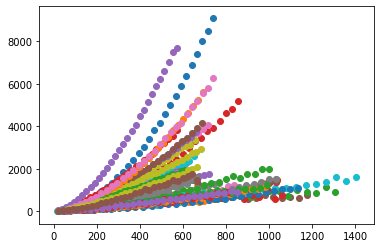

In [6]:
'''NV for many text'''
directory = "/home/xierr/Desktop/pato_new/DNA_use/"
outputdir = "/home/xierr/Desktop/pato_new/DNA_NV_results"
for book in os.listdir(directory):
    if not book.startswith("."):
        with open(directory + book) as f: 
        
            input_str = f.read()
            input_str = re.sub(r'[\t\n]+', '', input_str)  #remove \t
            tokens = [input_str[i] for i in range(0, len(input_str))]
            tokens_fre = nltk.FreqDist(tokens)
            most_fre = [key for key, value in sorted(tokens_fre.items(), key=lambda item: item[1],reverse=True)][0]
            number = find(input_str, most_fre)
        
            couLen=[]
            for l in range(0, len(number)-1, 1):
                couLen.append(number[l+1]-number[l]-1)
        
            num_words=len(couLen)
            word_len=couLen
            aver_leng=sum(word_len)/num_words
            wlen_fre=nltk.FreqDist(word_len)
            xsplit=len(input_str)
    
            vari=[]
            for L in range(50,1550,50):
                remain=xsplit%L
                if remain==0:
                    leng=xsplit+L
                    seq_vec1=seqenc(0, leng-1, L)   
                    seq_vec2=seqenc(((L/2)-1), (leng-L-1),L) 
                    ncut1=pandas.cut(number, seq_vec1, right=False)
                    n1=list(pandas.Series(ncut1).value_counts())
                    ncut2=pandas.cut(number, seq_vec2, right=False)
                    n2=list(pandas.Series(ncut2).value_counts())
                    n=[i for i in n1+n2 if i!=0]
                    vari.append(np.mean(np.square(n))-np.square(np.mean(n)))  
                else:
                    leng=xsplit-remain+L
                    seq_vec1=seqenc(0, leng-1, L)   
                    seq_vec2=seqenc(((L/2)-1), (leng-L-1),L) 
                    ncut1=pandas.cut(number, seq_vec1, right=False)
                    n1=list(pandas.Series(ncut1).value_counts())
                    ncut2=pandas.cut(number, seq_vec2, right=False)
                    n2=list(pandas.Series(ncut2).value_counts())
                    n=[i for i in n1+n2 if i!=0]
                    vari.append(np.mean(np.square(n))-np.square(np.mean(n))) 
            
            L_vec=[x/aver_leng for x in range(50, 1550,50)]
        
            d = {'L_vec':L_vec, 'vari':vari}
            df = pandas.DataFrame(data=d)
            df.to_csv(outputdir + '/' + book, sep='\t', index=False, header=None)
        
            plt.figure('Draw')
            plt.scatter(L_vec, vari)
            plt.draw()
        
    
    
#plt.plot(L_vec, L_vec) 
#plt.savefig('DNA_NV.png')